<a href="https://colab.research.google.com/github/shibin-CR7/CODESOFT/blob/main/movie_genre_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:


train = pd.read_csv('/content/train_data.txt', sep=':::',names=['Title', 'Genre', 'Description']).reset_index(drop=True)
train



<ipython-input-48-8c47f4f0880c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train = pd.read_csv('/content/train_data.txt', sep=':::',names=['Title', 'Genre', 'Description']).reset_index(drop=True)


,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [ ]:
test = pd.read_csv('/content/test_data.txt',sep=':::',names=['Title', 'Description']).reset_index(drop=True)
test

<ipython-input-49-43fc8b68ec9c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv('/content/test_data.txt',sep=':::',names=['Title', 'Description']).reset_index(drop=True)


,Title,Description
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
54195,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 847.0+ KB


In [ ]:
test.isna().sum()

Title          0
Description    0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 847.0+ KB


In [ ]:
genre_data = pd.concat([train,test], ignore_index=True)
data = genre_data

In [ ]:
data = data.dropna()
corpus = data["Description"].apply(lambda x: re.findall(r'\w+', x.lower()))
word2vec_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

def get_sentence_embedding(sentence):
    words = re.findall(r'\w+', sentence.lower())
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * 100

data["embeddings"] = data["Description"].apply(get_sentence_embedding)
X = pd.DataFrame(data["embeddings"].to_list())

label_encoder = LabelEncoder()
data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])
y = data["genre_encoded"]

<ipython-input-55-5c0e586f934b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["embeddings"] = data["Description"].apply(get_sentence_embedding)
<ipython-input-55-5c0e586f934b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])


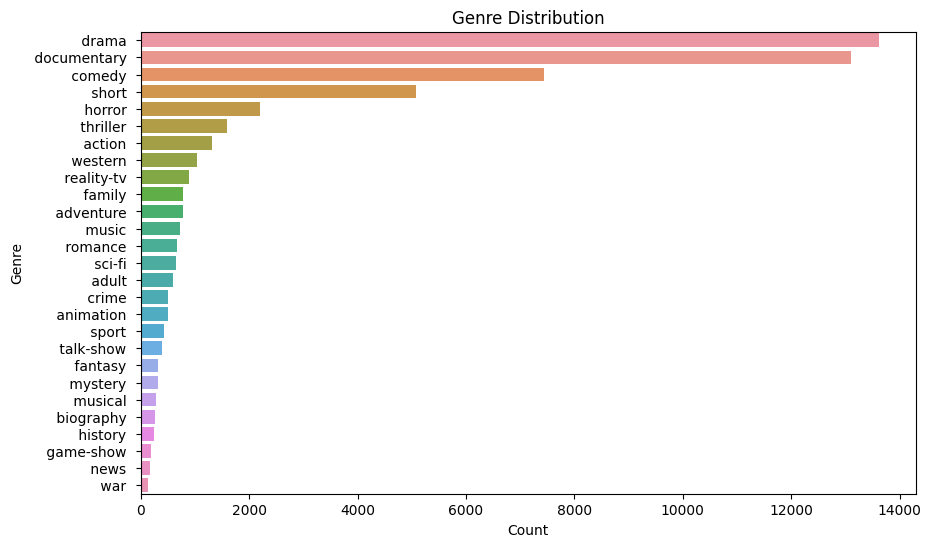

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=train,y='Genre',order=train['Genre'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title("Genre Distribution")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
y_pred

array([7, 7, 7, ..., 7, 8, 7])

In [ ]:
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
accuracy = accuracy_score(y_test,y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.41823223577865826
Recall: 0.479387623351471
Accuracy: 0.479387623351471


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.36      0.01      0.03       268
           1       0.00      0.00      0.00       123
           2       0.00      0.00      0.00       158
           3       0.00      0.00      0.00       101
           4       0.00      0.00      0.00        58
           5       0.38      0.38      0.38      1508
           6       0.00      0.00      0.00        89
           7       0.56      0.87      0.68      2647
           8       0.44      0.76      0.55      2687
           9       1.00      0.01      0.01       157
          10       0.00      0.00      0.00        65
          11       0.92      0.38      0.54        29
          12       0.00      0.00      0.00        50
          13       0.39      0.11      0.17       458
          14       0.56      0.18      0.27       136
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        77
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_mat)

Confusion Matrix:
 [[   4    0    0    0    0   45    0   56  133    0    0    0    0   10
     0    0    0    0    0    0    1    0    3    0    2    0   14]
 [   0    0    0    0    0   48    0   13   60    0    0    0    0    0
     1    0    0    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0   32    0   38   81    0    0    0    0    4
     0    0    0    0    0    0    0    0    0    0    0    0    3]
 [   0    0    0    0    0   24    0   30   37    0    0    0    0    6
     0    0    0    0    0    0    0    4    0    0    0    0    0]
 [   0    0    0    0    0    1    0   46   11    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    1    0  572    0  201  699    0    0    0    0    4
     4    0    0    0    0    0    0   17    0    0    0    0   10]
 [   1    0    0    0    0   21    0   10   53    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    4]
 